In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_excel("Real estate valuation data set.xlsx", engine='openpyxl')
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Data Preprocessing

In [5]:
df.drop('No', axis = 1, inplace = True)
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].values
y = df['Y house price of unit area'].values
print(X.shape)
print(y.shape)

(414, 6)
(414,)


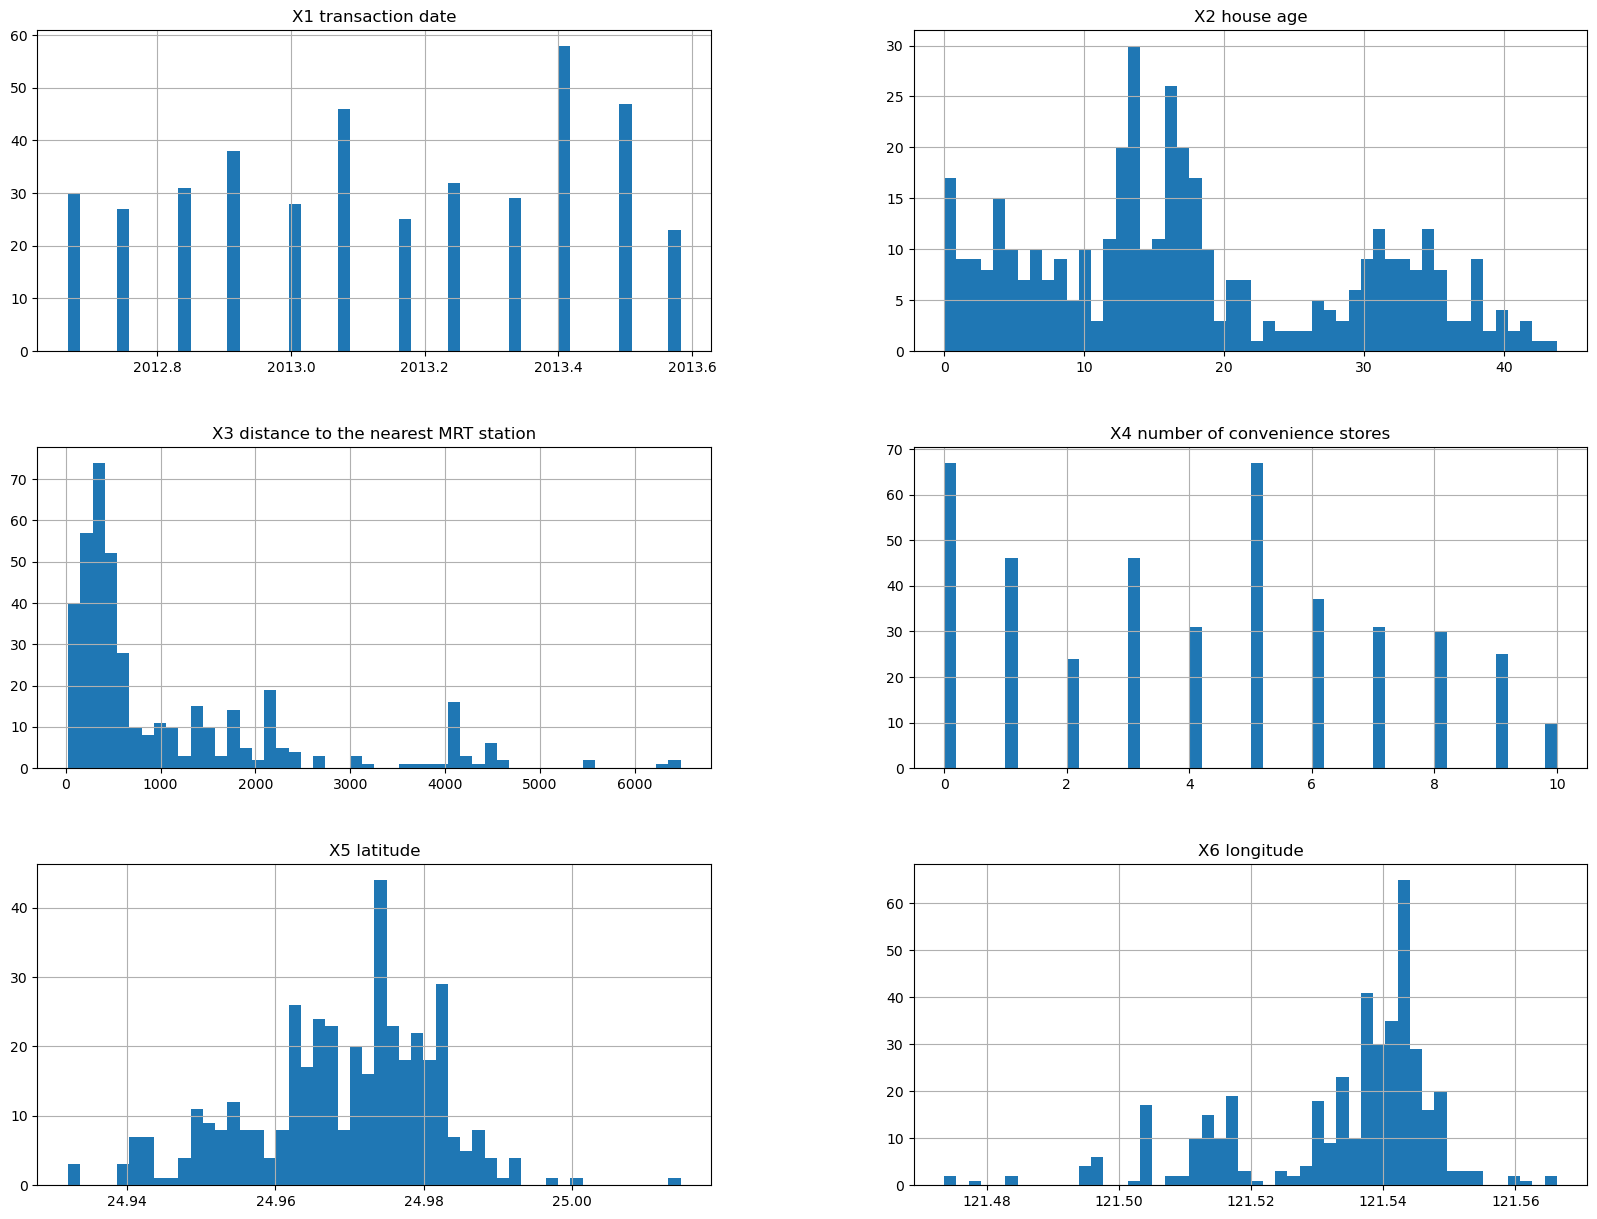

In [6]:
# plot data structure to observe the distributions
## transform X(numpy array) to XX(pandas dataframe) to use functions easily 
XX = df.drop(columns = ['Y house price of unit area'])
%matplotlib inline
import matplotlib.pyplot as plt
XX.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='X6 longitude', ylabel='X5 latitude'>

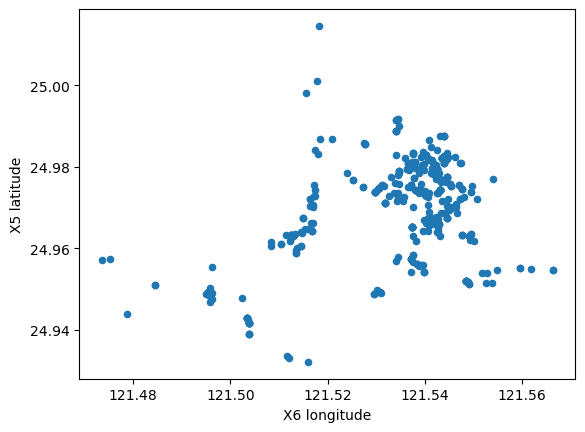

In [7]:
XX.plot(kind="scatter", x="X6 longitude", y="X5 latitude")

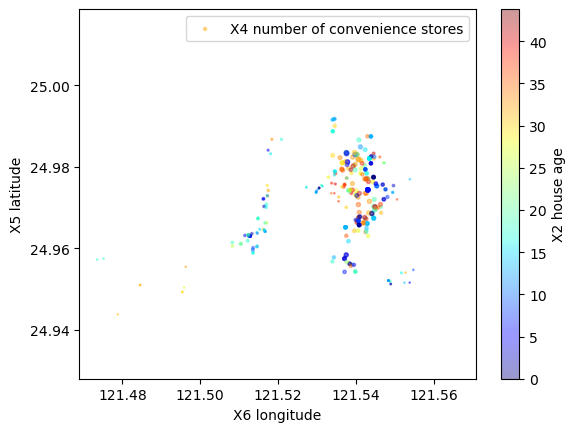

In [8]:
# plot the geographic data
XX.plot(kind="scatter", x="X6 longitude", y="X5 latitude", alpha=0.4,
             s=XX["X4 number of convenience stores"], label="X4 number of convenience stores",
             c="X2 house age", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

# s presents for number of convenience stores
# c presents for house age

# Feature Selection/Engineering:

In [9]:
# compute the standard correlation coefficient
corr_matrix = df.corr()
corr_matrix["Y house price of unit area"].sort_values(ascending=False)



Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

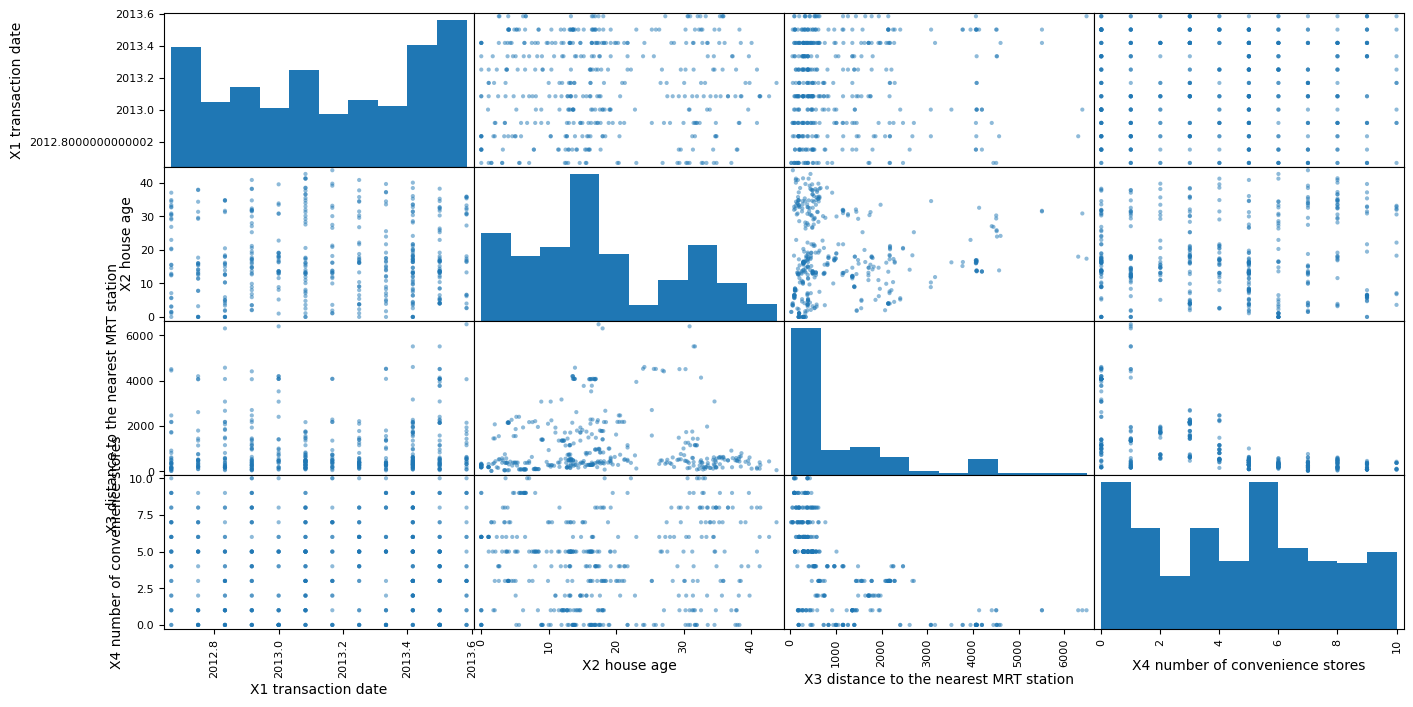

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station','X4 number of convenience stores']
scatter_matrix(XX[attributes], figsize=(16, 8));
# Using Pandas’scatter_matrix function to check for correlation between attributes

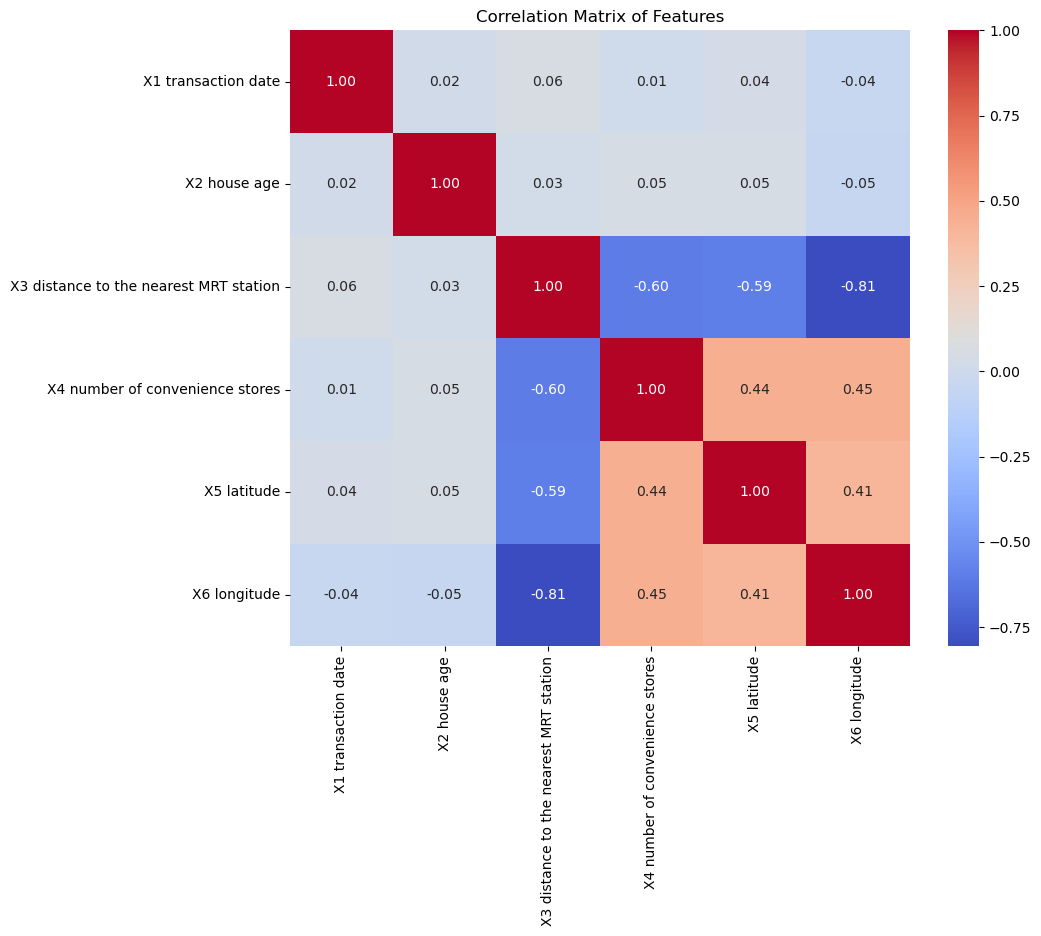

In [11]:
import seaborn as sns
correlation_matrix = XX.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [12]:
# Function to find some of the variables have high correlation
def correlation(df,threshold):
    corr_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_cols.add(colname)
                
    return corr_cols

In [13]:
corr_feature = correlation(XX, 0.7)
corr_feature

{'X6 longitude'}

In [14]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function to compute VIF values
def preprocessing(X):    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)
preprocessing(XX)

         VIF                                Features
0   3.952917                     X1 transaction date
1   3.411777                            X2 house age
2   1.897496  X3 distance to the nearest MRT station
3   4.521181         X4 number of convenience stores
4  12.136412                             X5 latitude
5  12.546908                            X6 longitude


In [15]:
# remove some of variable have high correlation
XX.drop(labels = corr_feature, axis = 1, inplace = True)
X = XX.values
X.shape

(414, 5)

In [16]:
preprocessing(XX)

        VIF                                Features
0  3.766251                     X1 transaction date
1  3.325666                            X2 house age
2  1.895209  X3 distance to the nearest MRT station
3  4.225780         X4 number of convenience stores
4  6.891647                             X5 latitude


In [17]:
# Trying to combine new features if it could improve performance.
XX['Target'] = y
XX['X7 convenience stores per distance to the nearest MRT station'] = XX['X4 number of convenience stores']/XX['X3 distance to the nearest MRT station']
corr_matrix = XX.corr()
corr_matrix['Target'].sort_values(ascending=False)


Target                                                           1.000000
X4 number of convenience stores                                  0.571005
X5 latitude                                                      0.546307
X7 convenience stores per distance to the nearest MRT station    0.431922
X1 transaction date                                              0.087529
X2 house age                                                    -0.210567
X3 distance to the nearest MRT station                          -0.673613
Name: Target, dtype: float64

In [18]:
# Building optional transform
from sklearn.base import BaseEstimator, TransformerMixin

# column index
dis_ix = 2
stores_ix = 3  

# Transformer class that adds the combined attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_store_per_distance = True): # no *args or **kargs
        self.add_store_per_distance = add_store_per_distance
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        store_per_distance = X[:, stores_ix] / X[:, dis_ix]
        if self.add_store_per_distance:
            return np.c_[X, store_per_distance]
        else:
            return X


# Model Training And Model Evaluation

In [19]:
# split dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 24)

In [20]:
nCol = X_train.shape[1]
nCol

5

In [21]:
X_train = X_train.reshape(-1,nCol)
X_test = X_test.reshape(-1,nCol) 

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")

Training size: 	X_train: (331, 5) 	y_train: (331, 1)
Testing size: 	X_test: (83, 5) 	y_test: (83, 1)


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Building pipeline
num_pipeline = Pipeline([
        ('attribs_adder', CombinedAttributesAdder(False)),
        ('std_scaler', StandardScaler()), #feature scaling (by Standardization)
    ])

In [23]:
from sklearn.linear_model import LinearRegression

# Choosing a predictive model to build a full pipeline
full_pipeline_with_predictor = Pipeline([
        ("preparation", num_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 Pipeline(steps=[('attribs_adder',
                                  CombinedAttributesAdder(add_store_per_distance=False)),
                                 ('std_scaler', StandardScaler())])),
                ('linear', LinearRegression())])

In [24]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

predictions = full_pipeline_with_predictor.predict(X_test)

lin_mse = mean_squared_error(y_test, predictions)
print('MSE:',lin_mse)

lin_mae = mean_absolute_error(y_test, predictions)
print('MAE: ',lin_mae)

lin_r2 = r2_score(y_test, predictions)
print('R2_score:',lin_r2)

MSE: 57.08797465965973
MAE:  5.8515215803418785
R2_score: 0.6738355962339102


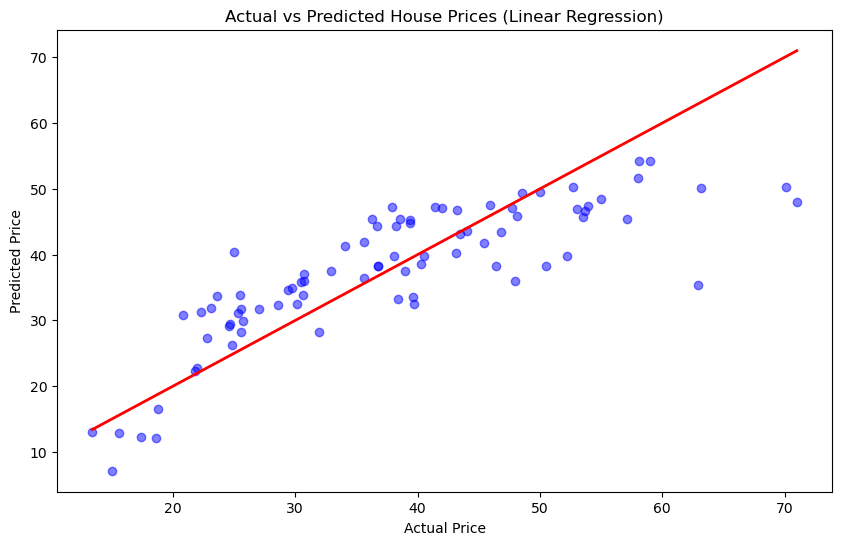

In [25]:
predictions = full_pipeline_with_predictor.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-r', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.show()

In [26]:
# Training without Pipeline
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

predictions = regressor.predict(X_test)
print(">> Test MSE: ", mean_squared_error(y_test, predictions))

print(">> Test MAE: ", mean_absolute_error(y_test, predictions))

print(">> Test R2: ", r2_score(y_test, predictions))


>> Test MSE:  62.21150728671301
>> Test MAE:  6.15766590514961
>> Test R2:  0.6445629871697143


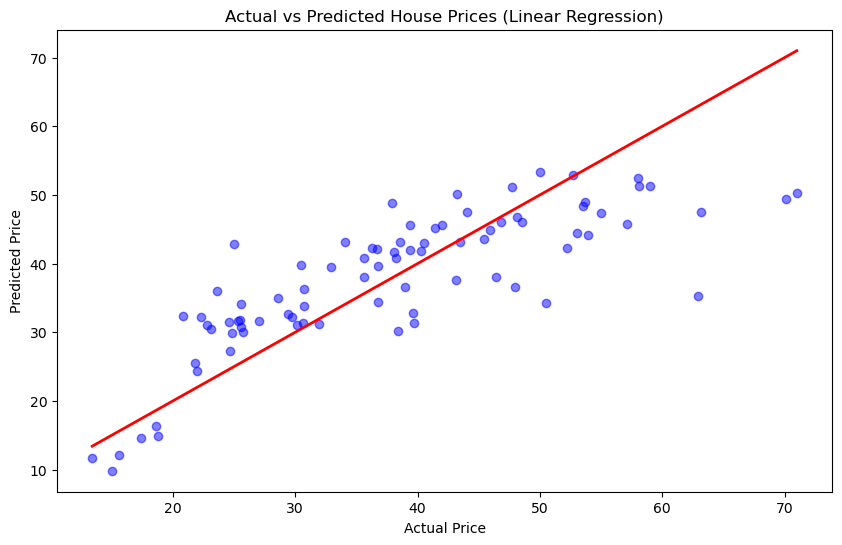

In [28]:
predictions = regressor.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-r', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.show()

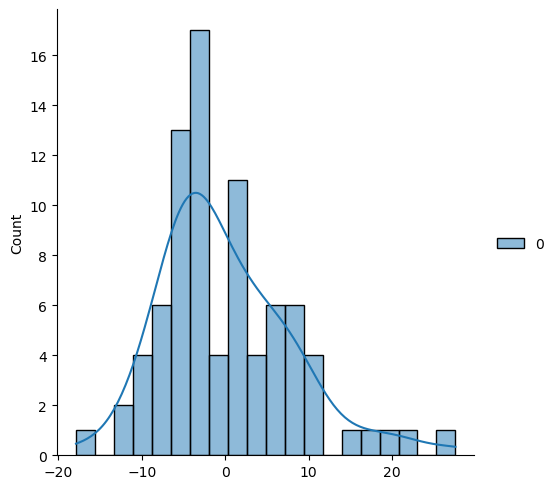

In [29]:
predictions = regressor.predict(X_test)
residuals = y_test - predictions
sns.displot(residuals, bins = 20, kde = True)

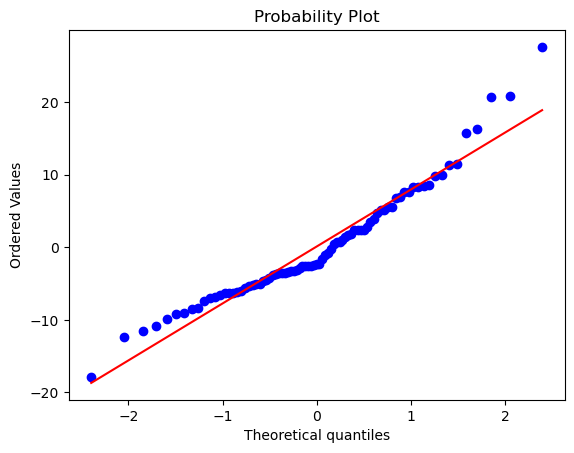

In [30]:
import pylab 
import scipy.stats as stats
res = residuals[:,0]
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

In [31]:
#perform linear regression using the ordinary least squares (OLS) method
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Fit the model with the intercept
model_1 = sm.OLS(y_train,X_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     82.73
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           7.65e-56
Time:                        21:01:33   Log-Likelihood:                -1199.6
No. Observations:                 331   AIC:                             2411.
Df Residuals:                     325   BIC:                             2434.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.603e+04   3842.615     -4.171      0.0

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(full_pipeline_with_predictor, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
pipeline_rmse_scores = np.sqrt(-scores)

C:\Users\User\AppData\Local\Temp\ipykernel_13644\983718650.py:15: RuntimeWarning: divide by zero encountered in true_divide
  store_per_distance = X[:, stores_ix] / X[:, dis_ix]
C:\Users\User\AppData\Local\Temp\ipykernel_13644\983718650.py:15: RuntimeWarning: divide by zero encountered in true_divide
  store_per_distance = X[:, stores_ix] / X[:, dis_ix]
C:\Users\User\AppData\Local\Temp\ipykernel_13644\983718650.py:15: RuntimeWarning: divide by zero encountered in true_divide
  store_per_distance = X[:, stores_ix] / X[:, dis_ix]
C:\Users\User\AppData\Local\Temp\ipykernel_13644\983718650.py:15: RuntimeWarning: divide by zero encountered in true_divide
  store_per_distance = X[:, stores_ix] / X[:, dis_ix]
C:\Users\User\AppData\Local\Temp\ipykernel_13644\983718650.py:15: RuntimeWarning: divide by zero encountered in true_divide
  store_per_distance = X[:, stores_ix] / X[:, dis_ix]
C:\Users\User\AppData\Local\Temp\ipykernel_13644\983718650.py:15: RuntimeWarning: divide by zero encountered i

In [33]:
 def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(pipeline_rmse_scores)

Scores: [ 6.91328786  8.97120965 11.58605251 15.63936823  5.90537388  7.16074655
  7.29332297  9.27111493  8.82411269  6.45897579]
Mean: 8.80235650710571
Standard deviation: 2.7778948726153363


# Conclusion and Further Analysis:
- Dữ liệu còn ít để đưa ra thực tế.
- Các đặc trưng có mối tương quan khá lớn với nhau.
- Cần thu thập thêm dữ liệu để đánh giá khái quát bài toán hồi quy.
- Nhìn chung có thể dùng những mô hình đơn giản để xử lý, nhưng khi một quan sát mới đưa vào có thể dẫn tới sai số lớn khi mô hình đơn giản. 
- Hiệu suất của model dựa trên các sai số, R^2 tạm ổn, tuy nhiên vấn đề về Multicollinearity chưa được giải quyết hoàn chỉnh nên vẫn còn ảnh hưởng đến kết quả dự đoán
- Cần thu thập thêm đặc trưng tương quan đối với biến mục tiêu.